# Lập trình thống kê cơ bản với Python

# Bài 9: Ước tính cỡ mẫu cho bài toán so sánh trung bình

### BS. Lê Ngọc Khả Nhi


# Giới thiệu

Chào các bạn, trong bài hôm nay Nhi sẽ hướng dẫn các bạn dùng lập trình hàm trong Python để ước tính cỡ mẫu cho 3 phân tích thống kê đơn giản: 

1) So sánh trung bình 1 mẫu với một giá trị tham chiếu (kiểm định t 1 mẫu)

2) So sánh trung bình 2 mẫu độc lập (kiểm định t)

3) So sánh bắt cặp tuần tự trung bình nhiều phân nhóm (post-hoc test của ANOVA đơn biến)

Nhắc lại: Ước tính cỡ mẫu có bản chất là 1 bài toán mô phỏng và tối ưu hóa. Nguyên tắc là mô phỏng giá trị n trong công thức của một trị số thống kê, tùy theo giá trị giả định của các tham số khác trong công thức này. Mỗi câu hỏi/giả thuyết nghiên cứu sẽ dẫn chúng ta đến lựa chọn một trị số thống kê chuyên biệt, tương ứng với 1 công thức tính cỡ mẫu chuyên biệt.

Một quy trình ước tính cỡ mẫu gồm 3 bước chính:

1) Phát biểu giả thuyết H0, H1, từ đó chọn công thức phù hợp

2) Mô phỏng sự thay đổi của cỡ mẫu n trong nhiều điều kiện (hoàn cảnh) khác nhau của các tham số trong công thức. Thí dụ: các tham số như lực thống kê (statistical power hay $ 1 - \beta$ ), sai lầm type I ($\alpha$) mang ý nghĩa kỳ vọng, trong khi các tham số khác mang ý nghĩa giả định

3) Biện luận về tương quan giữa kỳ vọng, tính khả thi, nguồn lực, thời gian ... để chọn giá trị cỡ mẫu hợp lý để đưa vào kế hoạch nghiên cứu.

In [1]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt

# Bài toán so sánh trung bình 1 mẫu

## Phát biểu giả thuyết

Mục tiêu của bài toán là chứng minh giá trị trung bình $\mu$ khác với một giá trị tham chiếu $\mu0$, tương ứng với kiểm định t 1 mẫu:

Giả thuyết H0 và H1 của bài toán là:

$H_0:\mu=\mu_0$
    
$H_1:\mu\neq\mu_0$

## Công thức tính cỡ mẫu:

$n=\left(\sigma\frac{z_{1-\alpha/2}+z_{1-\beta}}{\mu-\mu_0}\right)^2$

## Công thức tính power:

$1-\beta=
		\Phi\left(z-z_{1-\alpha/2}\right)+\Phi\left(-z-z_{1-\alpha/2}\right)
		\quad ,\quad z=\frac{\mu-\mu_0}{\sigma/\sqrt{n}}$
        
Trong đó:

$n$ là cỡ mẫu

$\mu$ là trung bình giả định

$\sigma$ là độ lệch chuẩn giả định

$\mu0$ là trung bình tham chiếu

$\Phi$ là hàm Standard normal distribution

$\Phi^{-1}$ là hàm Standard Normal quantile

$\alpha$ là Type I error

$\beta$ là Type II error, từ đó 1−β là power

Ghi chú: $\mu$, $\sigma$ có thể lấy từ y văn, nghiên cứu pilot hoặc hoàn toàn giả định


## Viết hàm tính cỡ mẫu và power

In [225]:
def sample_size_1m1s(mu = 0, mu0 = 0, sigma = 1, alpha = 0.05, beta = 0.2):
    n = (sigma * (norm.ppf(1 - alpha*0.5) + norm.ppf(1 - beta))/(mu - mu0))**2
    z=(mu-mu0)/sigma*np.sqrt(n)
    power = norm.cdf(z - norm.ppf(1 - alpha*0.5)) + norm.cdf(-z - norm.ppf(1 - alpha*0.5))
    
    return n, power

In [227]:
sample_size_1m1s(mu = 2, mu0 = 1.5, sigma = 1, alpha = 0.05, beta = 0.2)

(31.395518937396353, 0.8000009605622266)

## Vẽ biểu đồ mô phỏng 

In [184]:
def plot_1m(mu = 0, mu0 = 0, sigma = 1, alpha = 0.05, beta = 0.2):
    
    tm = np.linspace((mu - 0.3*sigma), (mu + 0.6*sigma), num=30)
    hm = np.linspace((mu0 - 0.2*sigma), (mu0 + 0.2*sigma), num=30)
    s = np.linspace(0.01, sigma + (sigma/2), num=30)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,5))
    fig.suptitle('So sánh trung bình 1 mẫu')
    ax1.set_ylabel('Cỡ mẫu')
    ax1.set_xlabel('Trung bình thực tế')
    ax2.set_xlabel('Trung bình H0')
    ax3.set_xlabel('Độ lệch chuẩn sigma')
    
    for b in [0.05,0.1,0.2,0.25,0.3,]:
        sample1 = [sample_size_1m1s(mu = x, mu0 = mu0, sigma = sigma, alpha = alpha, beta = b)[0] for x in tm]
        ax1.plot(tm, sample1, label = f'power: {1-b}')
        sample2 = [sample_size_1m1s(mu = mu, mu0 = x, sigma = sigma, alpha = alpha, beta = b)[0] for x in hm]
        ax2.plot(hm, sample2, label = f'power: {1-b}')
        sample3 = [sample_size_1m1s(mu = mu, mu0 = mu0, sigma = x, alpha = alpha, beta = b)[0] for x in s]
        ax3.plot(s, sample3, label = f'power: {1-b}')
        ax1.legend()

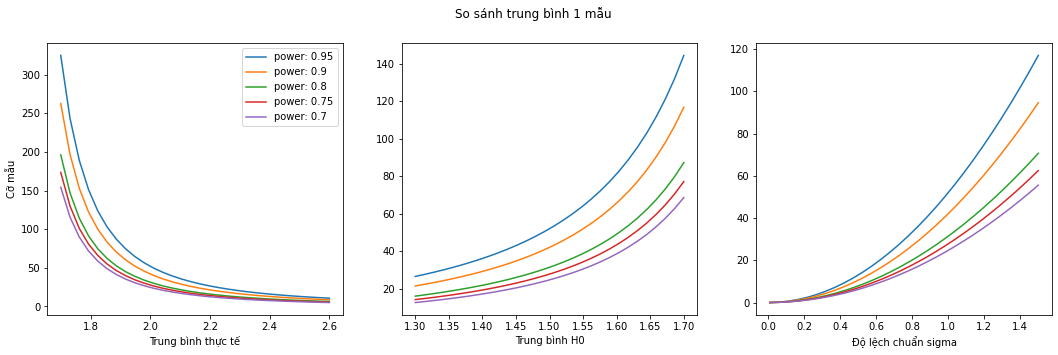

In [185]:
plot_1m(mu = 2, mu0 = 1.5, sigma = 1, alpha = 0.05, beta = 0.2)

# Bài toán so sánh trung bình 2 mẫu độc lập

## Phát biểu giả thuyết

Mục tiêu của bài toán là kiểm định liệu có sự khác biệt giữa 2 giá trị trung bình của 2 mẫu độc lập A và B; tương ứng với kiểm định t Student 2 mẫu độc lập.

Giả thuyết vô hiệu (H) và đối thuyết (H1) như sau:

$H_0:\mu_A-\mu_B=0$

$H_1:\mu_A-\mu_B\neq0$

## Công thức tính cỡ mẫu

$n_A=\kappa n_B \;\text{ and }\;
		n_B=\left(1+\frac{1}{\kappa}\right)
			\left(\sigma\frac{z_{1-\alpha/2}+z_{1-\beta}}{\mu_A-\mu_B}\right)^2$
            
## Công thức tính power

$1-\beta=
		\Phi\left(z-z_{1-\alpha/2}\right)+\Phi\left(-z-z_{1-\alpha/2}\right)
		\quad ,\quad z=\frac{\mu_A-\mu_B}{\sigma\sqrt{\frac{1}{n_A}+\frac{1}{n_B}}}$
        
Trong đó:

$n_A$ là cỡ mẫu phân nhóm A

$\mu_A$ là trung bình giả định của phân nhóm A

$\mu_B$ là trung bình giả định của phân nhóm B

$\sigma$ là độ lệch chuẩn giả định

$\kappa=\frac{n_A}{n_B}$ là tỉ lệ cỡ mẫu giữa 2 nhóm, ta có thể thiết kế thí nghiệm với 2 phân nhóm bất đối xứng về kích thước. 

$\Phi$ là hàm Standard normal distribution

$\Phi^{-1}$ là hàm Standard Normal quantile

$\alpha$ là Type I error

$\beta$ là Type II error, từ đó 1−β là power

Lưu ý là công thức chỉ tính $n_B$ là cỡ mẫu phân nhóm A, ta phải tự suy ra cỡ mẫu nhóm B theo công thức $n_A=\kappa n_B$, và cỡ mẫu chung 

n = $n_A + n_B$. 

$\mu_A$, $\mu_B$, $\sigma$ có thể lấy từ y văn, nghiên cứu pilot hoặc hoàn toàn giả định

## Viết hàm tính nA, nB, n và power

In [176]:
def sample_size_2m2s(muA = 0, 
                     muB = 0, 
                     kappa=1, 
                     sigma = 1, 
                     alpha = 0.05, 
                     beta = 0.2):
    nB=(1+1/kappa)*(sigma*(norm.ppf(1-alpha*0.5)+norm.ppf(1-beta))/(muA-muB))**2
    nA = nB * kappa
    z=(muA-muB)/(sigma*np.sqrt((1+1/kappa)/nB))
    power= norm.cdf(z-norm.ppf(1-alpha/2))+norm.cdf(-z-norm.ppf(1-alpha*0.5))
    return nA, nB, nA+nB, power

In [177]:
sample_size_2m2s(muA = 5, 
                muB = 10, 
                kappa=1, 
                sigma = 10, 
                alpha = 0.05, 
                beta = 0.2)

(62.79103787479271, 62.79103787479271, 125.58207574958541, 0.8000009605622266)

## Vẽ biểu đồ mô phỏng

In [215]:
def plot_2m(muA = 0, muB = 0, kappa=1, sigma = 1, alpha = 0.05, beta = 0.2):
    
    ma = np.linspace((muA - 0.2*sigma), (muA + 0.3*sigma), num=30)
    mb = np.linspace((muB - 0.2*sigma), (muB + 0.3*sigma), num=30)
    s = np.linspace(0.01, sigma + (sigma/2), num=30)
    k = np.linspace(0.2, 1, num=30)
    
    fig, axs = plt.subplots(2,2, figsize=(12,12))
    
    fig.suptitle('So sánh trung bình 2 mẫu')
    axs[0, 0].set_ylabel('Cỡ mẫu nhóm A')
    axs[0, 0].set_xlabel('Trung bình nhóm A')
    axs[0, 1].set_ylabel('Cỡ mẫu nhóm B')
    axs[0, 1].set_xlabel('Trung bình nhóm B')
    axs[1, 0].set_ylabel('Cỡ mẫu A+B')
    axs[1, 0].set_xlabel('Độ lệch chuẩn sigma')
    axs[1, 1].set_ylabel('Cỡ mẫu A+B')
    axs[1, 1].set_xlabel('Tỉ lệ nA/nB')
    
    for b in [0.05,0.1,0.2,0.25,0.3,]:
        sample1 = [sample_size_2m2s(muA = x, muB= muB, kappa = kappa, sigma = sigma, alpha = 0.05, beta = b)[0] for x in ma]
        axs[0, 0].plot(ma, sample1, label = f'power: {1-b}')
        sample2 = [sample_size_2m2s(muA = muA, muB= x, kappa = kappa, sigma= sigma, alpha = 0.05, beta = b)[1] for x in mb]
        axs[0, 1].plot(mb, sample2, label = f'power: {1-b}')
        sample3 = [sample_size_2m2s(muA = muA, muB= muB, kappa = kappa, sigma= x, alpha = 0.05, beta = b)[2] for x in s]
        axs[1, 0].plot(s, sample3, label = f'power: {1-b}')
        sample4 = [sample_size_2m2s(muA = muA, muB= muB, kappa = x,sigma= sigma, alpha = 0.05, beta = b)[2] for x in k]
        axs[1, 1].plot(k, sample4, label = f'power: {1-b}')
        axs[0, 0].legend()

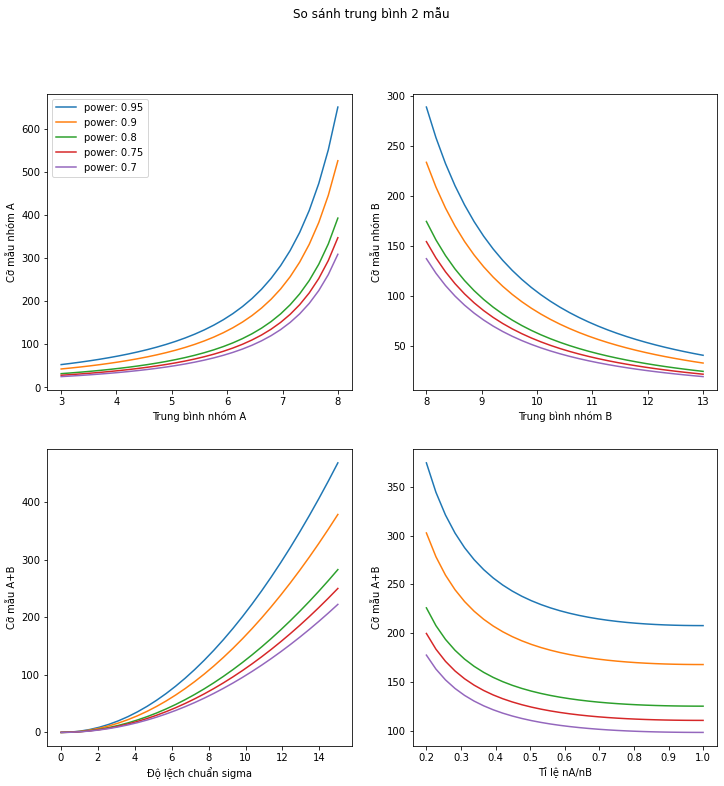

In [216]:
plot_2m(muA = 5, 
                muB = 10, 
                kappa=1, 
                sigma = 10, 
                alpha = 0.05, 
                beta = 0.2)

# Bài toán so sánh bắt cặp nhiều phân nhóm

## Phát biểu giả thuyết

Bài toán này có mục tiêu kiểm tra liệu có sự khác biệt về giá trị trung bình giữa nhiều (k) phân nhóm, bằng cách so sánh bắt cặp tuần tự giữa 1 nhóm này và 1 nhóm khác, nó tương ứng với post-hoc test của một phân tích phương sai đơn biến. 

Một cách tổng quát, với k phân nhóm ta có tổng số $K\equiv\binom{k}{2}=k(k-1)/2$ cặp so sánh tuần tự.

Khi thực hiện tuần tự $\tau\le K$ cặp so sánh, ta sẽ có ương ứng $\tau$ giả thuyết H0 và H1 với nội dung như sau:

$H_0:\mu_A=\mu_B$

$H_1:\mu_A\ne\mu_B$

Trong đó $\mu_A$ và $\mu_A$ là giá trị trung bình (giả định) của 2 phân nhóm. 

## Công thức tính cỡ mẫu

Lưu ý là ở đây ta giả định 2 phân nhóm có cỡ mẫu đồng đều, cỡ mẫu chung n được ước tính qua công thức sau:

$n=2\left(\sigma\frac{z_{1-\alpha/(2\tau)}+z_{1-\beta}}{\mu_A-\mu_B}\right)^2$

## Công thức tính power

$1-\beta=
		\Phi\left(z-z_{1-\alpha/(2\tau)}\right)+\Phi\left(-z-z_{1-\alpha/(2\tau)}\right)
		\quad ,\quad z=\frac{\mu_A-\mu_B}{\sigma\sqrt{\frac{2}{n}}}$3
        
Trong đó:

$n$ là cỡ mẫu chung cho 2 phân nhóm A, B

$\mu_A$ là trung bình giả định của phân nhóm A

$\mu_B$ là trung bình giả định của phân nhóm B

$\sigma$ là độ lệch chuẩn giả định

$\tau$ là số lượt so sánh bắt cặp, 

$\Phi$ là hàm Standard normal distribution

$\Phi^{-1}$ là hàm Standard Normal quantile

$\alpha$ là Type I error

$\beta$ là Type II error, từ đó 1−β là power

Lưu ý: Mỗi lần áp dụng công thức cho 1 cặp so sánh, ta sẽ biết giá trị cỡ mẫu của mỗi phân nhóm = n/2. Nếu thiết kế thí nghiệm có nhiều (k) phân nhóm, và giả định ta muốn so sánh bắt cặp tuần tự cho tất cả các tổ hợp có thể giữa k phân nhóm,  ta phải lặp lại nhiều lần quy trình tính toán trên, với giá trị tau lớn hơn 1, sau đó cộng tất cả giá trị cỡ mẫu để có cỡ mẫu cần thiết cho thí nghiệm.

$\mu$, $\sigma$ có thể lấy từ y văn, nghiên cứu pilot hoặc hoàn toàn giả định

In [220]:
def sample_size_anova(muA = 0, muB = 0, 
                      sigma = 1, 
                      tau = 1,
                      alpha = 0.05, beta = 0.2):
    n = 2*(sigma*(norm.ppf(1-alpha/(2/tau)) + norm.ppf(1-beta))/(muA-muB))**2
    z=(muA-muB)/(sigma*np.sqrt(2/n))
    power= norm.cdf(z-norm.ppf(1-alpha/(2/tau)))+norm.cdf(-z-norm.ppf(1-alpha/(2/tau)))
    return n, power

Áp dụng công thức cho 1 thí dụ minh họa, với 1 cặp so sánh, 2 phân nhóm, ta tính được cỡ mẫu chung là n=63

In [221]:
sample_size_anova(muA = 5, muB = 10, 
                  sigma = 10, 
                  tau = 1,
                  alpha = 0.05, 
                  beta = 0.2)

(62.79103787479271, 0.8000009605622266)

# Biểu đồ mô phỏng

In [222]:
def plot_km(muA = 0, muB = 0, sigma = 1, tau = 1, alpha = 0.05, beta = 0.2):
    
    ma = np.linspace((muA - 0.2*sigma), (muA + 0.3*sigma), num=30)
    mb = np.linspace((muB - 0.2*sigma), (muB + 0.3*sigma), num=30)
    s = np.linspace(0.01, sigma + (sigma/2), num=30)
    t = np.linspace(1, 5, num=5)
    
    fig, axs = plt.subplots(2,2, figsize=(12,12))
    
    fig.suptitle('So sánh bắt cặp ANOVA 1 yếu tố')
    axs[0, 0].set_ylabel('Cỡ mẫu nhóm A')
    axs[0, 0].set_xlabel('Trung bình nhóm A')
    axs[0, 1].set_ylabel('Cỡ mẫu nhóm B')
    axs[0, 1].set_xlabel('Trung bình nhóm B')
    axs[1, 0].set_ylabel('Cỡ mẫu 2 nhóm')
    axs[1, 0].set_xlabel('Độ lệch chuẩn sigma')
    axs[1, 1].set_ylabel('Cỡ mẫu 2 nhóm')
    axs[1, 1].set_xlabel('Số cặp so sánh')
    
    for b in [0.05,0.1,0.2,0.25,0.3,]:
        sample1 = [sample_size_anova(muA = x, muB= muB, sigma = sigma, tau = tau, alpha = 0.05, beta = b)[0]/2 for x in ma]
        axs[0, 0].plot(ma, sample1, label = f'power: {1-b}')
        sample2 = [sample_size_anova(muA = muA, muB= x, sigma= sigma, tau = tau, alpha = 0.05, beta = b)[0]/2 for x in mb]
        axs[0, 1].plot(mb, sample2, label = f'power: {1-b}')
        sample3 = [sample_size_anova(muA = muA, muB= muB, sigma= x, tau = tau, alpha = 0.05, beta = b)[0] for x in s]
        axs[1, 0].plot(s, sample3, label = f'power: {1-b}')
        sample4 = [sample_size_anova(muA = muA, muB= muB, sigma= sigma, tau = x, alpha = 0.05, beta = b)[0] for x in t]
        axs[1, 1].plot(t, sample4, label = f'power: {1-b}')
        
        axs[0, 0].legend()

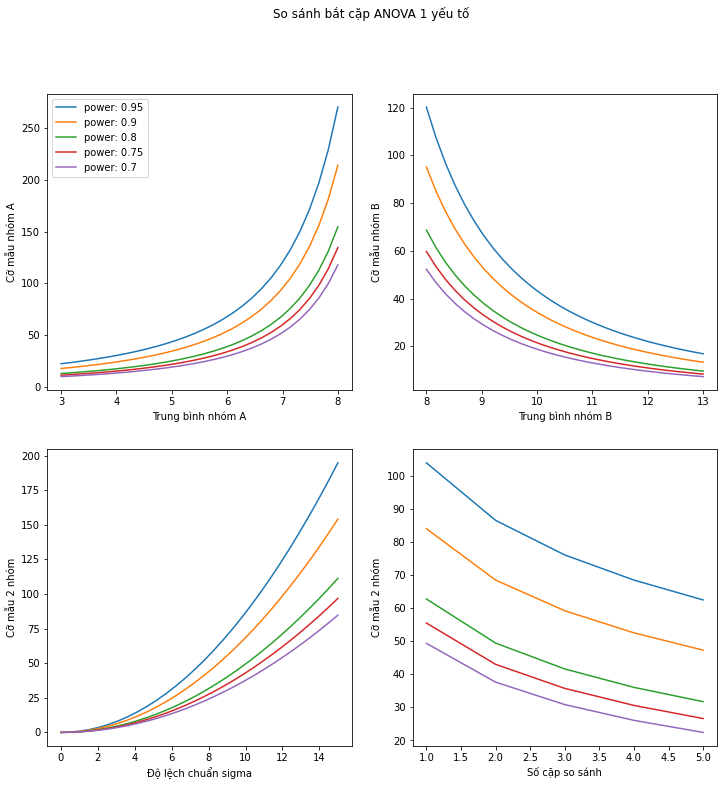

In [224]:
plot_km(muA = 5, muB = 10, 
                  sigma = 10, 
                  tau = 2,
                  alpha = 0.05, 
                  beta = 0.2)

# Diễn đạt về quy trình tính cỡ mẫu

Khi viết đề cương cho dự án nghiên cứu hay luận văn, quy trình ước tính cỡ mẫu có thể diễn đạt theo cấu trúc như sau:

Cơ sở giả thuyết: Mục tiêu / câu hỏi nghiên cứu chính của nghiên cứu là..., do đó cỡ mẫu được ước tính nhằm tối ưu sức mạnh thống kê của kiểm định so sánh ... với giả thuyết vô hiệu là không có sự khác biệt về trung bình giữa các phân nhóm. Chúng tôi sử dụng công thức ....

Trong đó: ... (giải thích ý nghĩa các tham số)

Z là trị số thống kê chuẩn hóa được tính theo công thức:...
Tham số alpha tương ứng với sai lầm Type I, Beta là sai lầm Type II và sức mạnh thống kê Power =1-beta.

Dựa theo thông tin từ nghiên cứu của XYZ và cộng sự (hoặc: dựa vào quan sát trên thực tế), chúng tôi thực hiện quy trình mô phỏng, sau đó đối chiếu với quỹ thời gian/nguồn lực của dự án, và đi đến kết luận:

Nhóm A cần ít nhất nA bệnh nhân (cỡ mẫu chung cần ít nhất n bệnh nhân) để đảm bảo phát hiện được khác biệt giữa nhóm A và B với sức mạnh thống kê 80% và nguy cơ sai lầm Type I < 0.05.

# Kết luận

Quy trình xác định cỡ mẫu trong đề cương/luận văn cần được trình bày một cách hợp lý hơn với những nội dung như sau:

Nên dựa trên cơ sở một câu hỏi nghiên cứu cụ thể, từ đó phát biểu giả thuyết vô hiệu (so sánh hơn/kém/tương đương), và dẫn đến một công thức tính toán rõ nghĩa.

Giá trị của các tham số cần được biện luận sử dụng thông tin từ y văn, giả thuyết tiền định, nghiên cứu pilot hoặc kết quả mô phỏng.

Không chỉ trình bày một giá trị duy nhất, nhưng nên có một hay nhiều kết quả mô phỏng cho các kịch bản khác nhau, bao gồm khả năng dao động ngẫu nhiên của các tham số, tỉ lệ mất mát dữ liệu.

Cuối cùng, kết quả mô phỏng và giả định sẽ được kiểm tra về tính khả thi, như thời gian, kinh phí, nhân lực và phương tiện… từ đó quyết định một con số cỡ mẫu tối ưu cân bằng giữa kì vọng và tính khả thi.


Tài liệu tham khảo: Chow S, Shao J, Wang H. 2008. Sample Size Calculations in Clinical Research. 2nd Ed. Chapman & Hall/CRC Biostatistics Series.